# Advance House Price Prediction

## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pylab import rcParams

pd.set_option("display.max_rows",None)
pd.set_option("display.max_columns",None)

## Import Data

In [2]:
df = pd.read_csv("E:\Downlload\HousePriceTrain.csv")

In [3]:
df = df.drop(['Id'],axis=1)

## Data Preprocessing

In [4]:
df.dtypes

MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
Alley             object
LotShape          object
LandContour       object
Utilities         object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation        object
BsmtQual          object
BsmtCond          object
BsmtExposure      object
BsmtFinType1      object
BsmtFinSF1         int64
BsmtFinType2      object
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
Heating           object
HeatingQC         object


In [5]:
df.isna().sum()

MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFinSF        0
GrLivArea 

In [6]:
df = df.drop(['Alley','PoolQC','Fence','MiscFeature'],axis=1)

In [7]:
df.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'WoodDeckSF'

In [8]:
df['LotFrontage'] = df['LotFrontage'].fillna(df['LotFrontage'].mode()[0])
df['BsmtQual'] = df['BsmtQual'].fillna(df['BsmtQual'].mode()[0])
df['BsmtCond'] = df['BsmtCond'].fillna(df['BsmtCond'].mode()[0])
df['MasVnrType'] = df['MasVnrType'].fillna(df['MasVnrType'].mode()[0])
df['MasVnrArea'] = df['MasVnrArea'].fillna(df['MasVnrArea'].mode()[0])
df['BsmtExposure'] = df['BsmtExposure'].fillna(df['BsmtExposure'].mode()[0])
df['BsmtFinType1'] = df['BsmtFinType1'].fillna(df['BsmtFinType1'].mode()[0])
df['BsmtFinType2'] = df['BsmtFinType2'].fillna(df['BsmtFinType2'].mode()[0])
df['Electrical'] = df['Electrical'].fillna(df['Electrical'].mode()[0])
df['FireplaceQu'] = df['FireplaceQu'].fillna(df['FireplaceQu'].mode()[0])
df['GarageType'] = df['GarageType'].fillna(df['GarageType'].mode()[0])
df['GarageYrBlt'] = df['GarageYrBlt'].fillna(df['GarageYrBlt'].mode()[0])
df['GarageFinish'] = df['GarageFinish'].fillna(df['GarageFinish'].mode()[0])
df['GarageQual'] = df['GarageQual'].fillna(df['GarageQual'].mode()[0])
df['GarageCond'] = df['GarageCond'].fillna(df['GarageCond'].mode()[0])

In [9]:
df.isna().sum()

MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
MasVnrArea       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinSF1       0
BsmtFinType2     0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
KitchenQual      0
TotRmsAbvGrd

In [10]:
df.isna().sum().sum()

0

In [11]:
cat_df=df.select_dtypes(include='object')

In [12]:
label_cat_df = cat_df.loc[:,['MSZoning','Street','LotShape','Utilities','LotConfig','LandSlope','Neighborhood','BldgType','HouseStyle','RoofStyle','RoofMatl','Exterior1st','Exterior2nd','MasVnrType','Foundation','BsmtFinType1','BsmtFinType2','Heating','CentralAir','Electrical','Electrical','Functional','GarageType','GarageFinish','SaleType']]

In [13]:
rank_cat_df = cat_df.loc[:,['LandContour','Condition1','Condition2','ExterQual','ExterCond','BsmtQual','BsmtCond','BsmtExposure','HeatingQC','KitchenQual','FireplaceQu','GarageQual','GarageCond','SaleCondition']]

In [14]:
len(cat_df.columns)

39

In [15]:
len(label_cat_df.columns)

25

In [16]:
len(rank_cat_df.columns)

14

In [17]:
cat_df.columns

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition'],
      dtype='object')

In [18]:
label_cat_df.columns

Index(['MSZoning', 'Street', 'LotShape', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'Foundation',
       'BsmtFinType1', 'BsmtFinType2', 'Heating', 'CentralAir', 'Electrical',
       'Electrical', 'Functional', 'GarageType', 'GarageFinish', 'SaleType'],
      dtype='object')

In [19]:
rank_cat_df.columns

Index(['LandContour', 'Condition1', 'Condition2', 'ExterQual', 'ExterCond',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'HeatingQC', 'KitchenQual',
       'FireplaceQu', 'GarageQual', 'GarageCond', 'SaleCondition'],
      dtype='object')

## Data Visualization

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000237D731C648>,
      dtype=object)

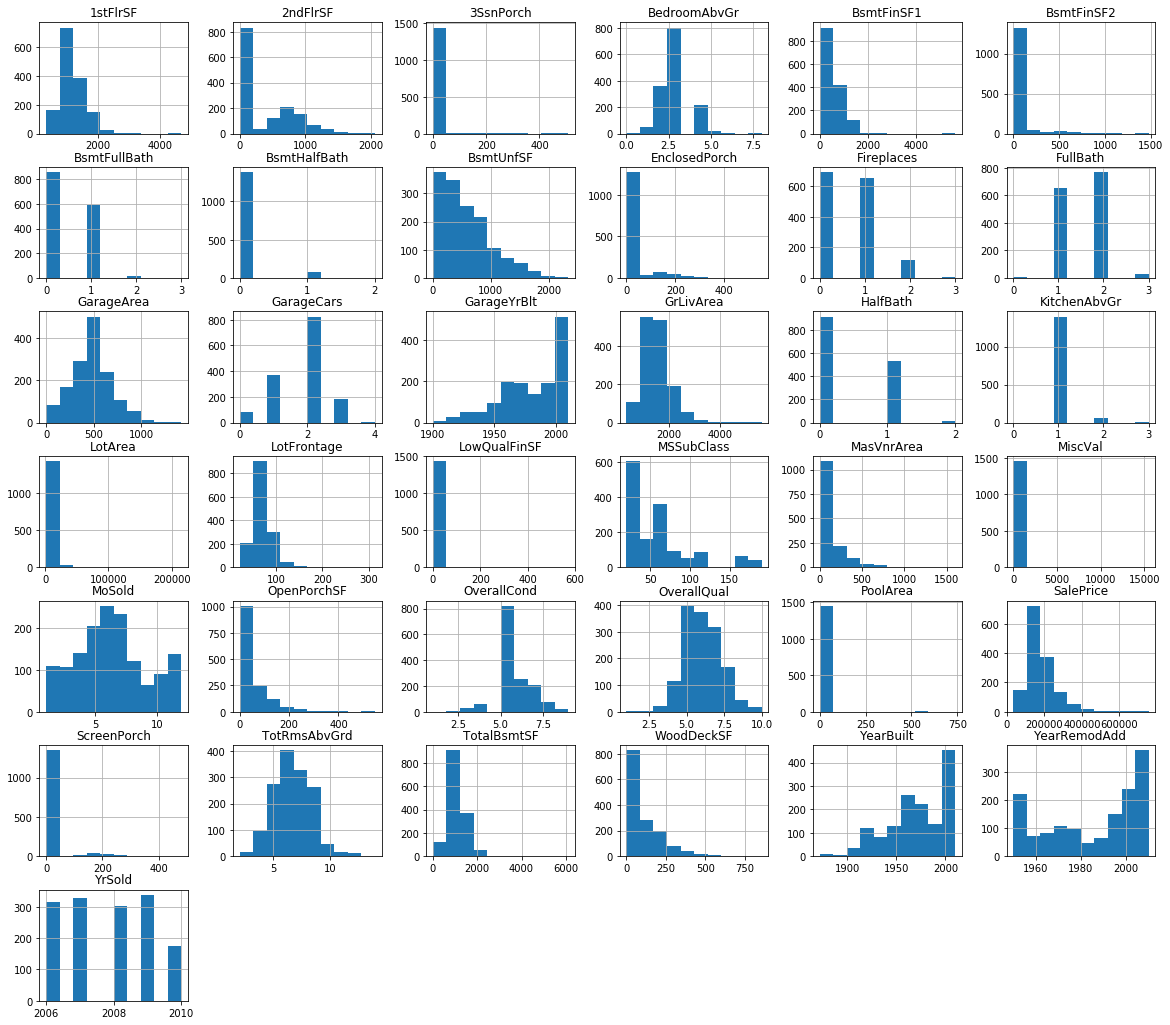

In [20]:
plt.rcParams["figure.figsize"] = 20,18
df.hist()

Text(0.5, 1.0, 'OverallCond wrt SalesPrice')

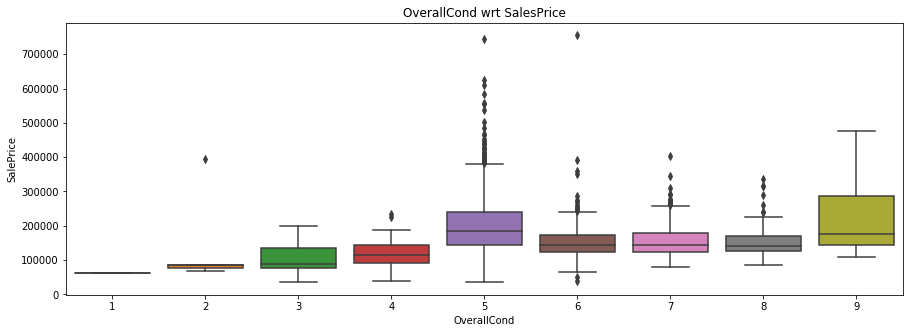

In [34]:
fig_dims = (15, 5)
fig, ax = plt.subplots(figsize=fig_dims)
sns.boxplot(df.OverallCond,df["SalePrice"],ax=ax)
plt.title("OverallCond wrt SalesPrice")

Text(0.5, 1.0, 'Fireplaces wrt SalesPrice')

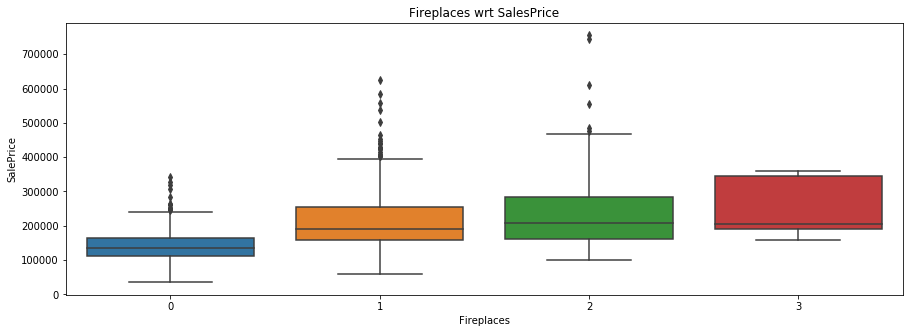

In [33]:
fig_dims = (15, 5)
fig, ax = plt.subplots(figsize=fig_dims)
sns.boxplot(df.Fireplaces,df["SalePrice"],ax=ax)
plt.title("Fireplaces wrt SalesPrice")

Text(0.5, 1.0, 'YearBuilt wrt SalesPrice')

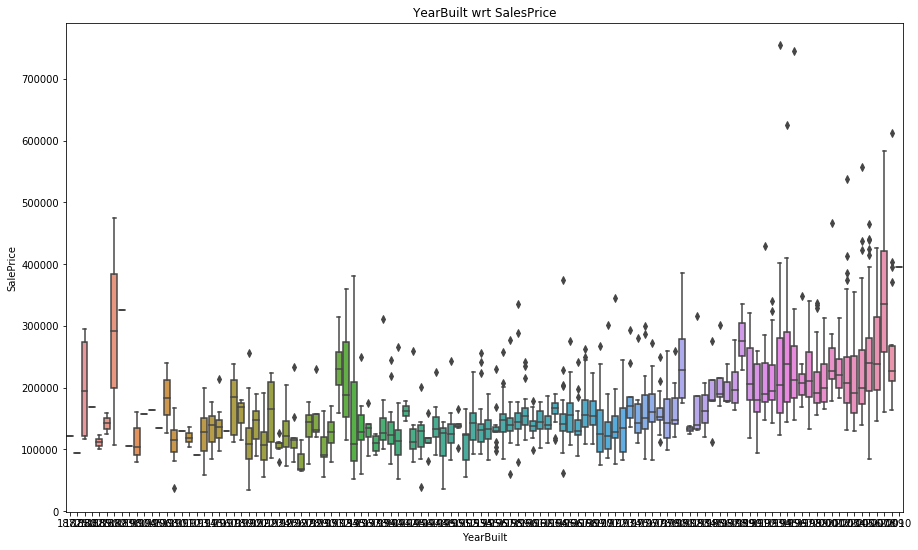

In [32]:
fig_dims = (15, 9)
fig, ax = plt.subplots(figsize=fig_dims)
sns.boxplot(df.YearBuilt,df["SalePrice"],ax=ax)
plt.title("YearBuilt wrt SalesPrice")

Text(0.5, 1.0, 'Zoning Classification wrt SalesPrice')

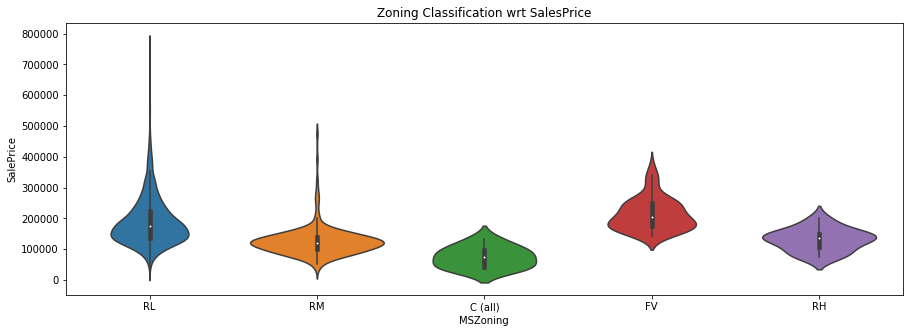

In [21]:
fig_dims = (15, 5)
fig, ax = plt.subplots(figsize=fig_dims)
sns.violinplot(df.MSZoning,df["SalePrice"],ax=ax)
plt.title("Zoning Classification wrt SalesPrice")

Text(0.5, 1.0, 'Type of Dwelling  wrt SalesPrice')

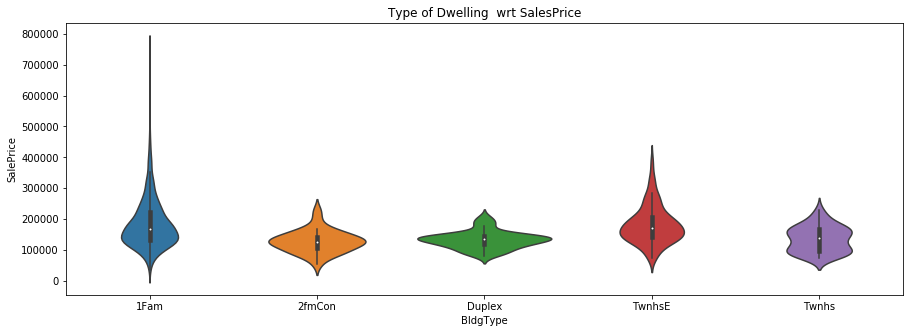

In [22]:
fig_dims = (15, 5)
fig, ax = plt.subplots(figsize=fig_dims)
sns.violinplot(df.BldgType,df.SalePrice,ax=ax)
plt.title("Type of Dwelling  wrt SalesPrice")

Text(0.5, 1.0, 'OverallCond wrt SalesPrice')

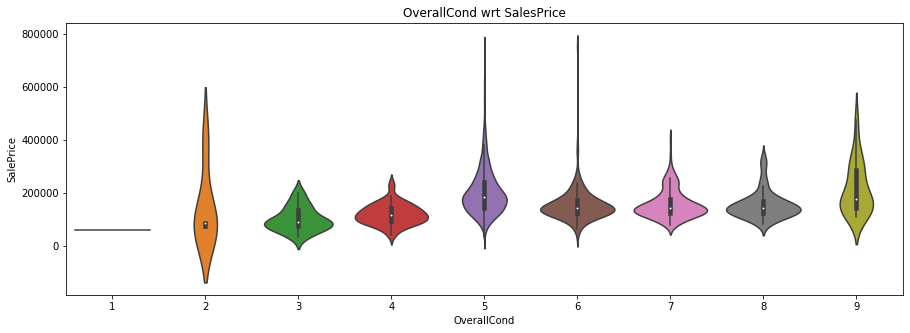

In [42]:
fig_dims = (15, 5)
fig, ax = plt.subplots(figsize=fig_dims)
sns.violinplot(df.OverallCond,df["SalePrice"],ax=ax)
plt.title("OverallCond wrt SalesPrice")

Text(0.5, 1.0, 'SaleCondition wrt SalesPrice')

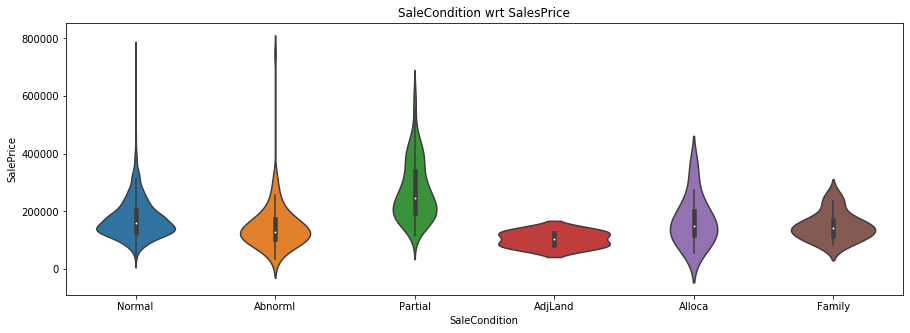

In [43]:
fig_dims = (15, 5)
fig, ax = plt.subplots(figsize=fig_dims)
sns.violinplot(df.SaleCondition,df.SalePrice,ax=ax)
plt.title("SaleCondition wrt SalesPrice")

Text(0.5, 1.0, 'HalfBath above Grade wrt SalesPrice')

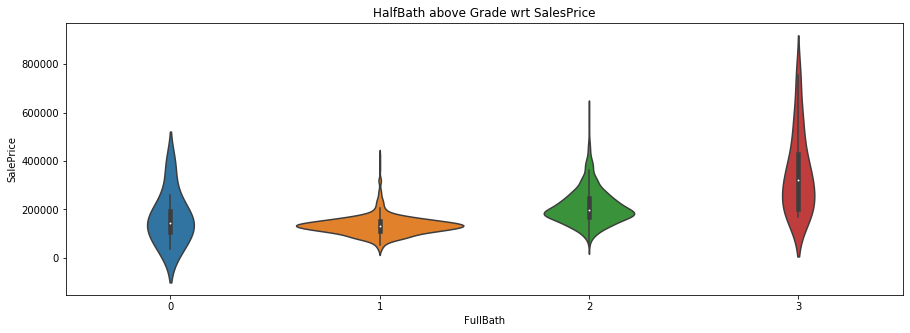

In [44]:
fig_dims = (15, 5)
fig, ax = plt.subplots(figsize=fig_dims)
sns.violinplot(df.FullBath,df.SalePrice,ax=ax)
plt.title("HalfBath above Grade wrt SalesPrice")

Text(0.5, 1.0, 'Quality of Basement Type 1  wrt SalesPrice')

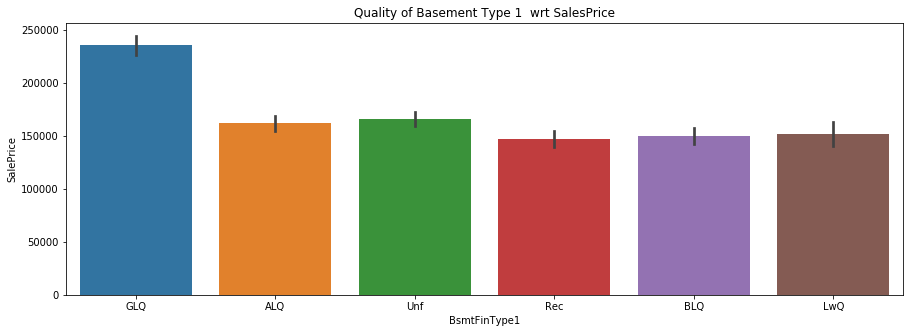

In [23]:
fig_dims = (15, 5)
fig, ax = plt.subplots(figsize=fig_dims)
sns.barplot(df.BsmtFinType1,df.SalePrice,ax=ax)
plt.title("Quality of Basement Type 1  wrt SalesPrice")

Text(0.5, 1.0, 'Quality of Basement Type 2 wrt SalesPrice')

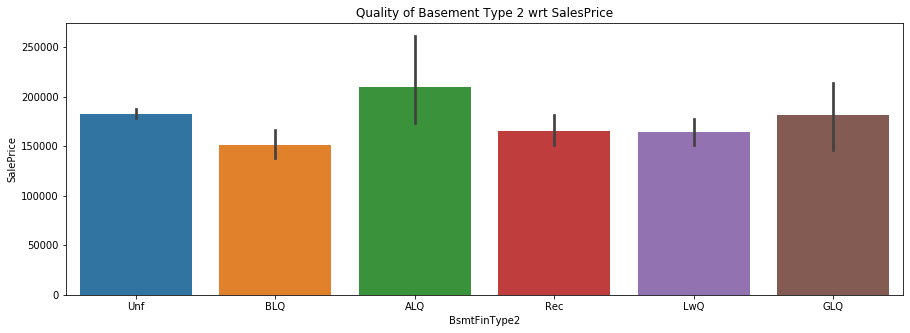

In [24]:
fig_dims = (15, 5)
fig, ax = plt.subplots(figsize=fig_dims)
sns.barplot(df.BsmtFinType2,df.SalePrice,ax=ax)
plt.title("Quality of Basement Type 2 wrt SalesPrice")

Text(0.5, 1.0, 'HalfBath above Grade wrt SalesPrice')

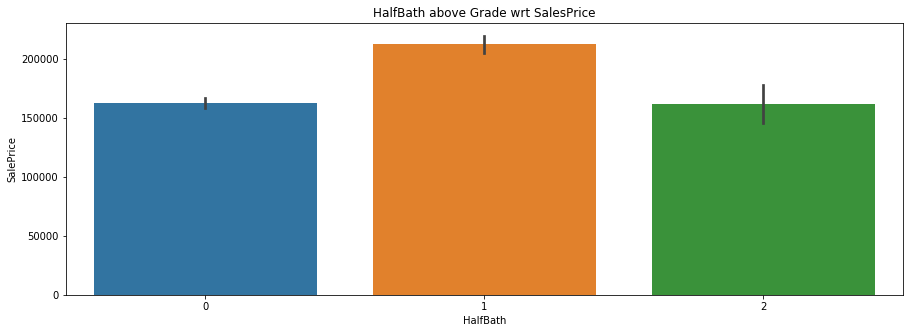

In [37]:
fig_dims = (15, 5)
fig, ax = plt.subplots(figsize=fig_dims)
sns.barplot(df.HalfBath,df.SalePrice,ax=ax)
plt.title("HalfBath above Grade wrt SalesPrice")

Text(0.5, 1.0, '$Value of mischellaneous feature wrt SalesPrice')

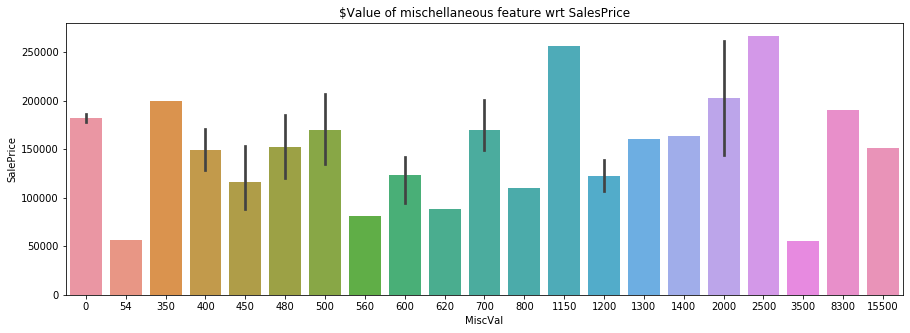

In [40]:
fig_dims = (15, 5)
fig, ax = plt.subplots(figsize=fig_dims)
sns.barplot(df.MiscVal,df.SalePrice,ax=ax)
plt.title("$Value of mischellaneous feature wrt SalesPrice")

Text(0.5, 1.0, 'SaleCondition wrt SalesPrice')

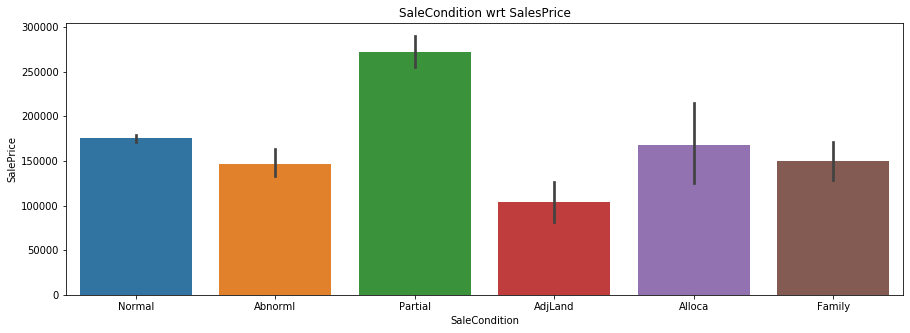

In [41]:
fig_dims = (15, 5)
fig, ax = plt.subplots(figsize=fig_dims)
sns.barplot(df.SaleCondition,df.SalePrice,ax=ax)
plt.title("SaleCondition wrt SalesPrice")

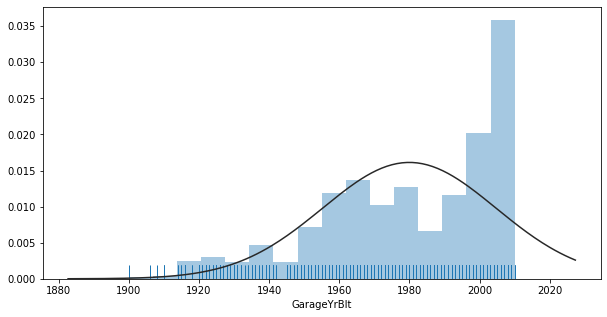

In [59]:
from scipy.stats import norm
fig_dims = (10, 5)
fig, ax = plt.subplots(figsize=fig_dims)
x = df['GarageYrBlt']
ax = sns.distplot(x, fit=norm , rug=True, kde=False)

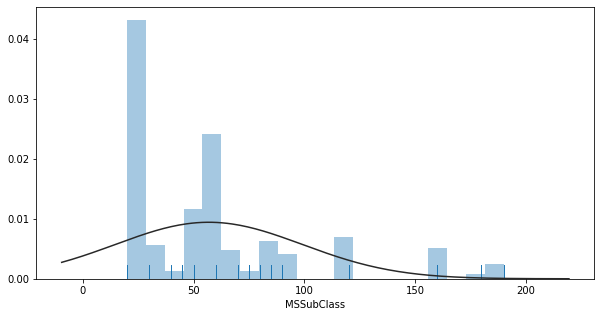

In [58]:
fig_dims = (10, 5)
fig, ax = plt.subplots(figsize=fig_dims)
x = df['MSSubClass']
ax = sns.distplot(x, fit=norm,  rug=True,kde=False)

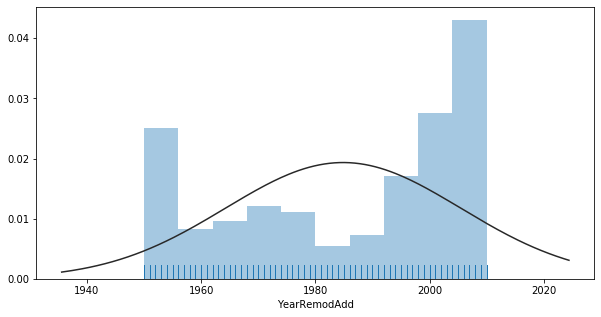

In [57]:
fig_dims = (10, 5)
fig, ax = plt.subplots(figsize=fig_dims)
x = df['YearRemodAdd']
ax = sns.distplot(x, fit=norm, rug=True, kde=False)

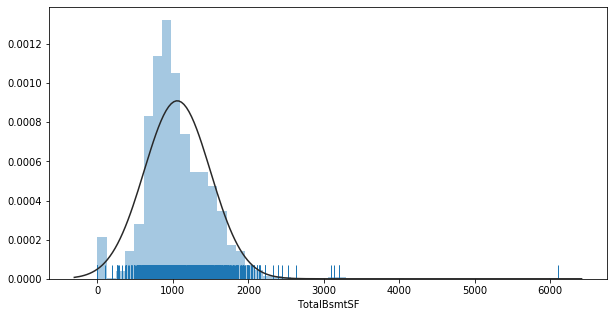

In [60]:
fig_dims = (10, 5)
fig, ax = plt.subplots(figsize=fig_dims)
x = df['TotalBsmtSF']
ax = sns.distplot(x, fit=norm, rug=True, kde=False)

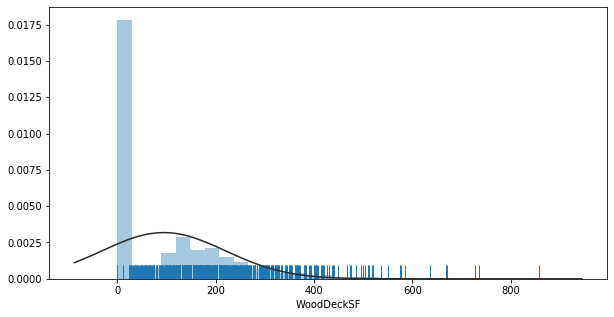

In [61]:
fig_dims = (10, 5)
fig, ax = plt.subplots(figsize=fig_dims)
x = df['WoodDeckSF']
ax = sns.distplot(x, fit=norm, rug=True, kde=False)

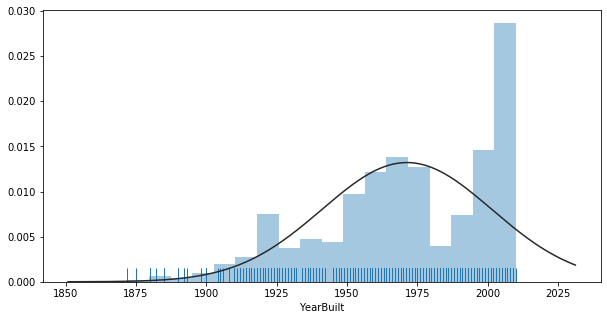

In [62]:
fig_dims = (10, 5)
fig, ax = plt.subplots(figsize=fig_dims)
x = df['YearBuilt']
ax = sns.distplot(x, fit=norm, rug=True, kde=False)

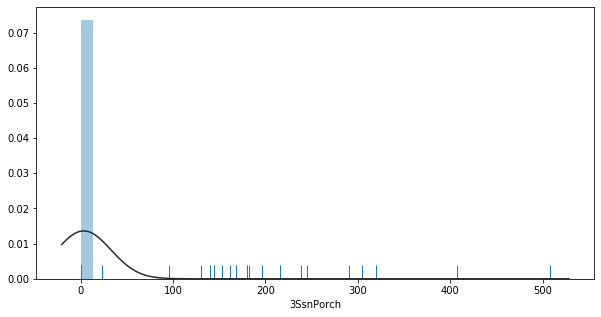

In [64]:
fig_dims = (10, 5)
fig, ax = plt.subplots(figsize=fig_dims)
x = df['3SsnPorch']
ax = sns.distplot(x, fit=norm, rug=True, kde=False)